In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt # 視覺化圖形

In [2]:
# image data
x = [[0,0,0,0,0,0,0,0,0,0],
     [0,1,1,0,1,0,0,0,1,1],
     [0,0,1,1,1,0,1,1,1,1],
     [0,0,1,1,0,0,1,1,1,1],
     [0,1,1,1,0,0,1,1,1,0],
     [0,0,0,0,0,0,0,0,1,0],
     [0,0,0,1,1,1,0,0,1,0],
     [0,0,0,1,1,1,1,0,0,0],
     [0,0,0,0,0,0,1,0,0,0],
     [0,0,0,0,0,0,1,0,0,0]]

In [3]:
n = 10
x = np.array(x).reshape(n,n)
x

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

# 我們假設 1 格面積 = 1 平方公分

[第 1 座島]
座標位置:  [2, 1]
座標位置:  [2, 2]
座標位置:  [2, 3]
座標位置:  [2, 4]
座標位置:  [1, 4]
座標位置:  [3, 4]
座標位置:  [3, 3]
座標位置:  [3, 2]
座標位置:  [4, 2]
座標位置:  [4, 1]
面積 = 11 平方公分

[第 2 座島]
座標位置:  [8, 2]
座標位置:  [8, 3]
座標位置:  [8, 4]
座標位置:  [8, 5]
座標位置:  [8, 6]
座標位置:  [7, 4]
座標位置:  [6, 4]
座標位置:  [6, 3]
座標位置:  [6, 2]
座標位置:  [7, 3]
座標位置:  [9, 3]
座標位置:  [7, 2]
座標位置:  [9, 2]
座標位置:  [9, 1]
面積 = 15 平方公分

[第 3 座島]
座標位置:  [3, 7]
座標位置:  [4, 7]
座標位置:  [5, 7]
座標位置:  [5, 6]
座標位置:  [6, 7]
座標位置:  [6, 8]
座標位置:  [6, 9]
座標位置:  [4, 6]
面積 = 9 平方公分

# 圖片中 => 有 3 座島


<function matplotlib.pyplot.show(*args, **kw)>

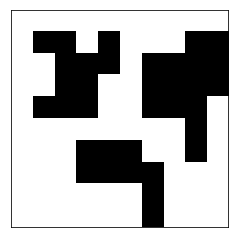

In [4]:
print("# 我們假設 1 格面積 = 1 平方公分")
y=[]
count=0
island=0
area=0
#所有1的位置
for i in range(n):
    for j in range(n):
        if x[i,j]==1:
            y.append([j,i])
            

# 判斷
for z in y:
    #buffer歸零
    buffer=[0]
    
    #如果checked(2),就跳迴圈
    if x[z[1],z[0]]==2:
        continue
        

    print("")
    #計算island數量
    island+=1
    area=0
    print("[第",island,"座島]")
    #初步尋找矩陣值不為零的座標
    if z[0]+1!=n: #邊界條件
        if x[z[1],z[0]+1]==1: # x+1 位置判斷(往右一格)
            x[z[1],z[0]+1]=3
            buffer.append([z[0]+1,z[1]])
            count+=1
    if z[0]-1!=-1:
        if x[z[1],z[0]-1]==1: # x-1 位置判斷(往左一格)
            x[z[1],z[0]-1]=3
            buffer.append([z[0]-1,z[1]])
            count+=1
    if z[1]+1!=n:
        if x[z[1]+1,z[0]]==1: # y+1 位置判斷(往下一格)
            x[z[1]+1,z[0]]=3
            buffer.append([z[0],z[1]+1])
            count+=1
    if z[1]-1!=-1:
        if x[z[1]-1,z[0]]==1: # y-1 位置判斷(往上一格)
            x[z[1]-1,z[0]]=3
            buffer.append([z[0],z[1]-1])
            count+=1
    
#將第一個不為零的矩陣位置改為checked
    x[z[1],z[0]]=2
    area+=1

    
#增加buffer格數
    for l in range(count,n+5):
        buffer.append([0,0])
#     print(buffer, count)

    #buffer功能
    while buffer[count]!=0:
        area+=1
        #目前判斷的位置
        print("座標位置: ",buffer[count])
        #偵測到1的數量
        add=0
        if buffer[count][0]+1!=n: #邊界條件
            if x[buffer[count][1],buffer[count][0]+1]==1: # x+1 位置判斷(往右一格)
                x[buffer[count][1],buffer[count][0]+1]=3 #將值命為pulled(3)
                add+=1
                buffer[count+add]=[buffer[count][0]+1,buffer[count][1]] #往buffer後一格放

        if buffer[count][0]-1!=-1:
            if x[buffer[count][1],buffer[count][0]-1]==1: # x-1 位置判斷(往左一格)
                x[buffer[count][1],buffer[count][0]-1]=3
                add+=1
                buffer[count+add]=[buffer[count][0]-1,buffer[count][1]]

        if buffer[count][1]+1!=n:
            if x[buffer[count][1]+1,buffer[count][0]]==1: # y+1 位置判斷(往下一格)
                x[buffer[count][1]+1,buffer[count][0]]=3
                add+=1
                buffer[count+add]=[buffer[count][0],buffer[count][1]+1]

        if buffer[count][1]-1!=-1:
            if x[buffer[count][1]-1,buffer[count][0]]==1: # y-1 位置判斷(往上一格)
                x[buffer[count][1]-1,buffer[count][0]]=3
                add+=1
                buffer[count+add]=[buffer[count][0],buffer[count][1]-1]

            
        x[buffer[count][1],buffer[count][0]]=2 #將目前的值令checked(2)

        for k in range(count,count+add+1): #將buffer座標全部往前移
            buffer[k]=buffer[k+1]
        count=count+add-1 #接下來要測的座標

    if count==0:
        print("面積 =",area,"平方公分")
        
print("")
print("# 圖片中 => 有",island,"座島")

        # https://www.cnblogs.com/denny402/p/5122594.html
plt.imshow(x, cmap=plt.cm.gray_r)  #cmap 顏色圖譜  _r 黑白對調
plt.xticks(())
plt.yticks(())
plt.show